In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Creating tensors in PyTorch

## PyTorch의 기본 데이터 단위: Tensor

## Tensor 자료형으로의 전환
● List → Tensor

torch.tensor(list data type)


● Numpy → Tensor

torch.from_numpy(numpy data type)

In [ ]:
a = [1, 2, 3] # list type
b = np.array([4, 5, 6], dtype=np.int32) # numpy type

In [ ]:
tensor_a = torch.tensor(a) # torch 자료형을 만드려면 torch.tensor(list data type)
tensor_b = torch.from_numpy(b) # numpy --> torch 자료형으로 전환
print(tensor_a)
print(tensor_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [ ]:
# numpy 처럼 ones, rand 와 같은 함수 존재
tensor_ones = torch.ones(2, 3)
print(tensor_ones.shape) # numpy 와 같이 데이터의 차원을 확인 가능
print(tensor_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.3154, 0.0309, 0.1718],
        [0.0476, 0.4705, 0.5047]])


# Manipulating the data type and shape of a tensor

In [ ]:
# 데이터 타입의 전환
tensor_a_new = tensor_a.to(torch.int64)
print(tensor_a_new.dtype)
print(tensor_a_new)
tensor_b_new = tensor_b.to(torch.float)
print(tensor_b_new.dtype)
print(tensor_b_new)

torch.int64
tensor([1, 2, 3])
torch.float32
tensor([4., 5., 6.])


In [ ]:
tensor_random = torch.rand(3, 5)
t_transposed = torch.transpose(tensor_random, 0, 1)
print(tensor_random.shape, '-->', t_transposed.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


# 모델 훈련

In [ ]:
tensor_zeros = torch.zeros(30)
tensor_reshape = tensor_zeros.reshape(5, 6)
print(tensor_reshape.shape)

torch.Size([5, 6])


In [ ]:
high_dim_tensor = torch.zeros(1, 2, 1, 4, 1)
tensor_squeezed = torch.squeeze(high_dim_tensor, 2)
print(high_dim_tensor.shape, "-->", tensor_squeezed.shape)
print(high_dim_tensor)
print(tensor_squeezed)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])
tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])
tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])


In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x.size())
y = torch.squeeze(x)
print(y.size())
y = torch.squeeze(x, 0)
print(y.size())
y = torch.squeeze(x, 1)
print(y.size())
y = torch.squeeze(x, (1, 2, 3))
print(y.size())

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])
torch.Size([2, 2, 2])


# Applying mathematical operations to tensors

In [ ]:
torch.manual_seed(1) # seed 고정
tensor1 = 2 * torch.rand(5, 2) - 1
tensor2 = torch.normal(mean=0, std=1, size=(5, 2))
print(tensor1)
print(tensor2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [ ]:
tensor3 = torch.multiply(tensor1, tensor2)
print(tensor3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [ ]:
tensor1 * tensor2

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [ ]:
tensor4 = torch.mean(tensor1, axis=0)
print(tensor4)
# sum, std...

tensor([-0.1373,  0.2028])


In [ ]:
tensor5 = torch.matmul(tensor1, torch.transpose(tensor2, 0, 1))
tensor6 = torch.matmul(torch.transpose(tensor1, 0, 1), tensor2)

In [ ]:
print(tensor5)
print(tensor6)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [ ]:
norm_tensor1 = torch.linalg.norm(tensor1, ord=2, dim=1)
print(norm_tensor1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [ ]:
torch.linalg.norm(tensor3, ord=2, dim=1)

tensor([0.5412, 0.6007, 1.1250, 0.7278, 0.0572])

# Split, stack, and concatenate tensors

In [ ]:
t = torch.rand(6)
print(t)

tensor([0.6397, 0.9743, 0.8300, 0.0444, 0.0246, 0.2588])


In [ ]:
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

[array([0.63968194, 0.97427773], dtype=float32),
 array([0.8300299 , 0.04443115], dtype=float32),
 array([0.0245958 , 0.25883394], dtype=float32)]

In [ ]:
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.9391, 0.4167, 0.7140, 0.2676, 0.9906])


[array([0.93905586, 0.4167155 , 0.7139797 ], dtype=float32),
 array([0.2676443, 0.990609 ], dtype=float32)]

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.cat([x, y, z]))
print(torch.stack([x, y, z]))
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([1., 4., 2., 5., 3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
print(torch.stack([x, y, z], dim=0))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# Creating a PyTorch DataLoader from existing tensors

In [ ]:
# DataLoader: not only iterate through a dataset directly, but also provides an automatic and customizable batching to dataset
'''
The optional drop_last argument is useful for cases when
the number of elements in the tensor is not divisible by the desired batch size. We can drop the last
non-full batch by setting drop_last to True. The default value for drop_last is False.
'''

from torch.utils.data import DataLoader
tensor_data = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(tensor_data)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [ ]:
data_loader = DataLoader(tensor_data, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}', batch)

batch 1 tensor([0., 1., 2.])
batch 2 tensor([3., 4., 5.])


# Combining two tensors into a joint dataset

In [ ]:
tensor_x = torch.rand([4, 3], dtype=torch.float32)
tensor_y = torch.arange(4)

'''
__init__(): This is where the initial logic happens, such as reading existing arrays, loading a file, filtering data, and so forth.
__getitem__(): This returns the corresponding sample to the given index.
'''

from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x=x
        self.y=y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

joint_dataset = JointDataset(tensor_x, tensor_y)
for example in joint_dataset:
    print('x: ', example[0], '  y: ', example[1])

x:  tensor([0.7570, 0.2346, 0.6471])   y:  tensor(0)
x:  tensor([0.3556, 0.4452, 0.0193])   y:  tensor(1)
x:  tensor([0.2616, 0.7713, 0.3785])   y:  tensor(2)
x:  tensor([0.9980, 0.9008, 0.4766])   y:  tensor(3)


In [ ]:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

batch 1: x: tensor([[0.9980, 0.9008, 0.4766],
        [0.3556, 0.4452, 0.0193]]) 
         y: tensor([3, 1])
batch 2: x: tensor([[0.2616, 0.7713, 0.3785],
        [0.7570, 0.2346, 0.6471]]) 
         y: tensor([2, 0])


In [ ]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.9980, 0.9008, 0.4766],
        [0.2616, 0.7713, 0.3785]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193]]) 
         y: tensor([0, 1])
epoch 2
batch 1: x: tensor([[0.2616, 0.7713, 0.3785],
        [0.9980, 0.9008, 0.4766]]) 
         y: tensor([2, 3])
batch 2: x: tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193]]) 
         y: tensor([0, 1])


/content/drive/MyDrive/cat-01.jpg
Image shape (900, 1200, 3)
/content/drive/MyDrive/cat-02.jpg
Image shape (900, 1200, 3)
/content/drive/MyDrive/cat-03.jpg
Image shape (900, 742, 3)
/content/drive/MyDrive/dog-01.jpg
Image shape (800, 1200, 3)
/content/drive/MyDrive/dog-02.jpg
Image shape (800, 1200, 3)
/content/drive/MyDrive/dog-03.jpg
Image shape (900, 1200, 3)


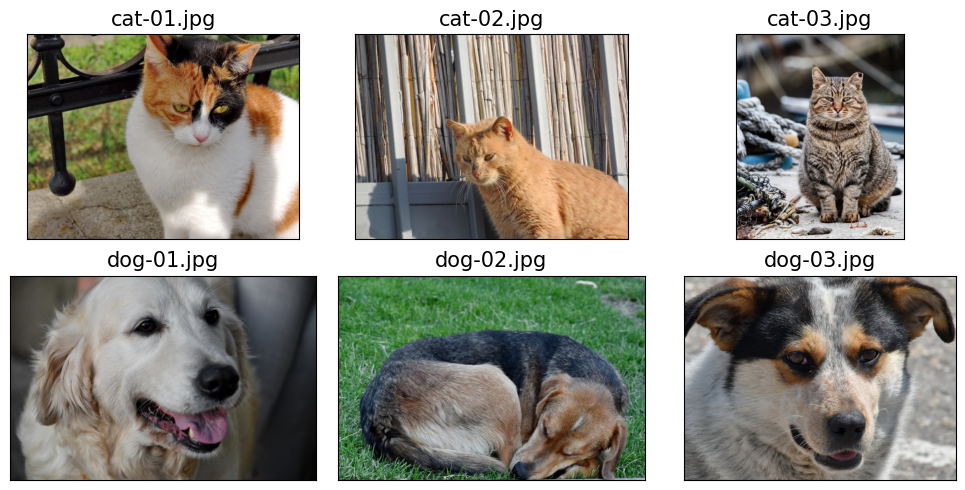

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
file_list = ["/content/drive/MyDrive/cat-01.jpg", "/content/drive/MyDrive/cat-02.jpg", "/content/drive/MyDrive/cat-03.jpg", "/content/drive/MyDrive/dog-01.jpg", "/content/drive/MyDrive/dog-02.jpg", "/content/drive/MyDrive/dog-03.jpg"]
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    print(file)
    img = Image.open(file)
    print("Image shape", np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

이미지 이름과 레이블 쌍을 만드는 Tensor Dataset 만들기

In [ ]:
file_list = ["/content/drive/MyDrive/cat-01.jpg", "/content/drive/MyDrive/cat-02.jpg", "/content/drive/MyDrive/cat-03.jpg", "/content/drive/MyDrive/dog-01.jpg", "/content/drive/MyDrive/dog-02.jpg", "/content/drive/MyDrive/dog-03.jpg"]
label = [0,0,0,1,1,1]

class ImagenameDataset(Dataset):
  def __init__(self, file_list, labels):
    self.file_list = file_list
    self.labels = labels

  def __getitem__(self, index):
    file_name = self.file_list[index]
    l = self.labels[index]
    return file_name, l

  def __len__(self):
    return len(self.labels)

image_dataset = ImagenameDataset(file_list, label)

for file, label in image_dataset:
  print("file_path:", file, "\nlabel:", label)

file_path: /content/drive/MyDrive/cat-01.jpg 
label: 0
file_path: /content/drive/MyDrive/cat-02.jpg 
label: 0
file_path: /content/drive/MyDrive/cat-03.jpg 
label: 0
file_path: /content/drive/MyDrive/dog-01.jpg 
label: 1
file_path: /content/drive/MyDrive/dog-02.jpg 
label: 1
file_path: /content/drive/MyDrive/dog-03.jpg 
label: 1


이미지와 레이블 쌍을 만드는 Tensor Dataset 만들기

In [ ]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

print(transform(Image.open("/content/drive/MyDrive/cat-01.jpg")))
# transform 을 통해 이미지가 전처리 됨(Tensor 데이터 형 변환, 이미지 사이즈 조정)

tensor([[[0.6936, 0.6963, 0.7159,  ..., 0.2654, 0.1588, 0.6738],
         [0.7007, 0.7140, 0.7463,  ..., 0.0782, 0.0402, 0.2887],
         [0.7417, 0.7640, 0.5953,  ..., 0.0978, 0.2027, 0.3049],
         ...,
         [0.5949, 0.4995, 0.4961,  ..., 0.9591, 0.9885, 0.9789],
         [0.5265, 0.5299, 0.4515,  ..., 0.9569, 0.9576, 0.9782],
         [0.5142, 0.5201, 0.5475,  ..., 0.9373, 0.9551, 0.9743]],

        [[0.6314, 0.6453, 0.6571,  ..., 0.2615, 0.1456, 0.6821],
         [0.6694, 0.6826, 0.7150,  ..., 0.0703, 0.0402, 0.2809],
         [0.7088, 0.7282, 0.5169,  ..., 0.0850, 0.1821, 0.2779],
         ...,
         [0.5478, 0.4525, 0.4294,  ..., 0.9159, 0.9532, 0.9436],
         [0.4755, 0.4789, 0.3926,  ..., 0.9216, 0.9301, 0.9507],
         [0.4632, 0.4691, 0.5034,  ..., 0.9020, 0.9277, 0.9468]],

        [[0.5672, 0.5708, 0.5669,  ..., 0.2811, 0.1186, 0.5130],
         [0.5792, 0.5963, 0.6287,  ..., 0.0821, 0.0377, 0.2956],
         [0.6373, 0.6539, 0.3998,  ..., 0.0841, 0.1806, 0.

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
file_list = ["/content/drive/MyDrive/cat-01.jpg", "/content/drive/MyDrive/cat-02.jpg", "/content/drive/MyDrive/cat-03.jpg", "/content/drive/MyDrive/dog-01.jpg", "/content/drive/MyDrive/dog-02.jpg", "/content/drive/MyDrive/dog-03.jpg"]
label = [0,0,0,1,1,1]

class ImageDataset(Dataset):
  def __init__(self, img_path_list, labels, transform):
    self.img_path = img_path_list
    self.labels = labels
    self.transform = transform

  def __getitem__(self, index):
    img = Image.open(self.img_path[index])
    img_transformed = self.transform(img)
    label = self.labels[index]
    return img_transformed, label

  def __len__(self):
    return len(self.labels)

image_dataset = ImageDataset(file_list, label, transform)

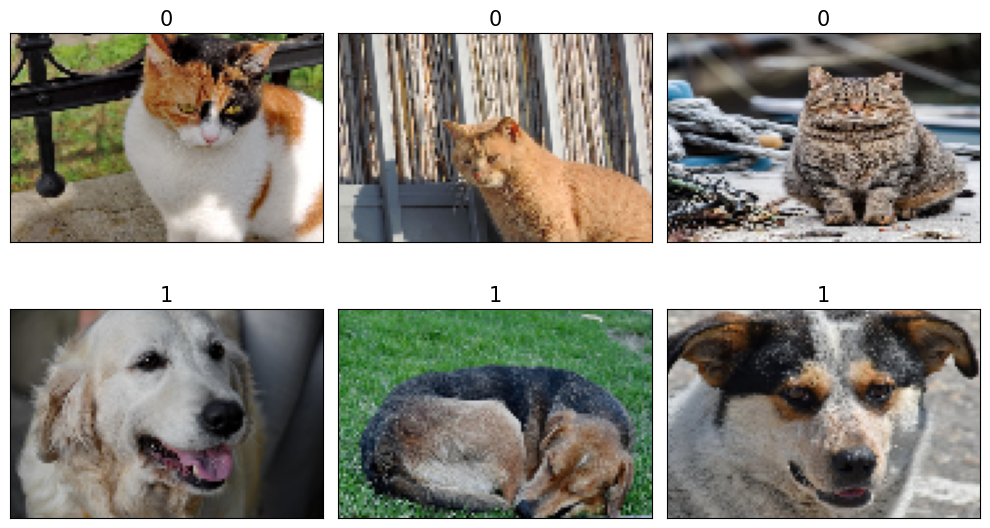

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(example[0].numpy().transpose((1, 2, 0)))
  ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

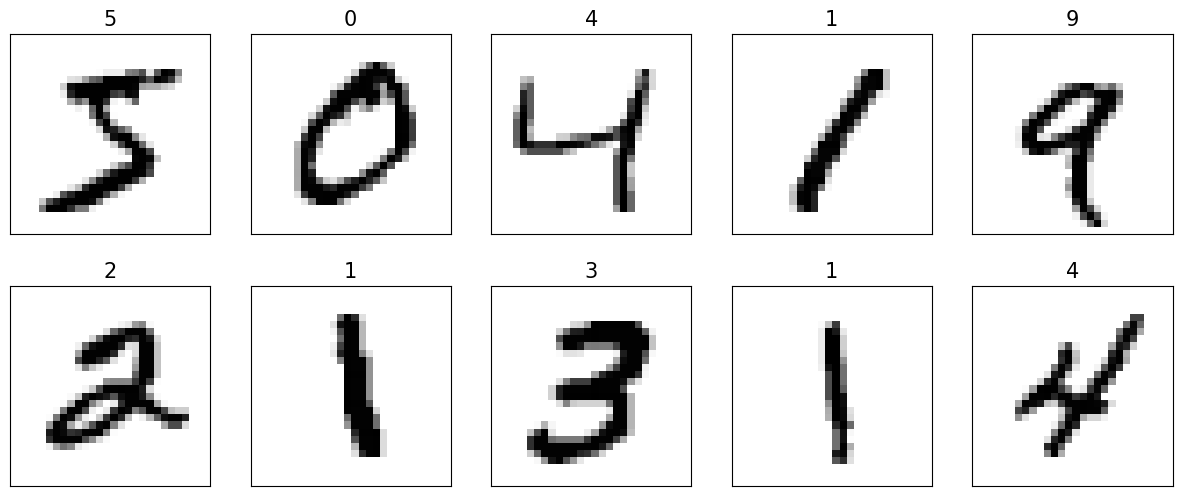

In [ ]:
import torchvision
from itertools import islice
mnist_dataset = torchvision.datasets.MNIST("/content/drive/MyDrive/", 'train', download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in  islice(enumerate(mnist_dataset), 10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image, cmap='gray_r')
  ax.set_title(f'{label}', size=15)
plt.show()

# 예제 1. Medical MNIST 데이터의 이미지(HeadCT와 ChestXray)와 레이블로 구성하는 배치 데이터 생성

In [ ]:
from PIL import Image
import pathlib
headct_imgdir_path = pathlib.Path("/content/drive/MyDrive/HeadCT_minidataset")
headct_file_list = sorted([str(path) for path in headct_imgdir_path.glob("*.jpeg")])

chestxray_imgdir_path = pathlib.Path("/content/drive/MyDrive/ChestXray_minidataset")
chestxray_file_list = sorted([str(path) for path in chestxray_imgdir_path.glob("*.jpeg")])

In [ ]:
print(headct_file_list)
print(chestxray_file_list)

['/content/drive/MyDrive/HeadCT_minidataset/000000.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000001.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000002.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000003.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000004.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000005.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000006.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000007.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000008.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000009.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000010.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000011.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000012.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000013.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000014.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000015.jpeg', '/content/drive/MyDrive/HeadCT_minidataset/000016.jpeg', '/content/drive/MyDrive/HeadCT

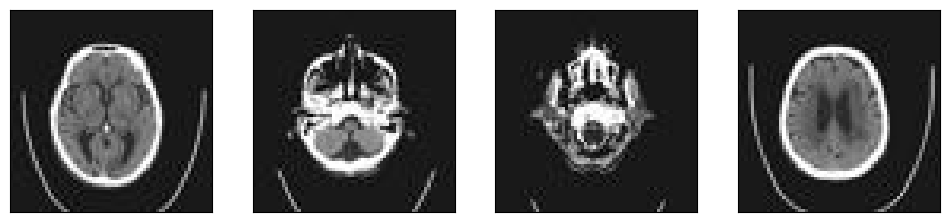

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i, image_path in islice(enumerate(headct_file_list), 4):
  headct_img = Image.open(image_path)
  ax = fig.add_subplot(1, 4, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(headct_img, cmap='gray')

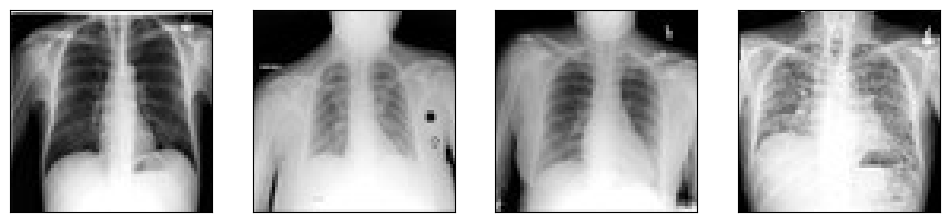

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i, image_path in islice(enumerate(chestxray_file_list), 4):
  chestxray_img = Image.open(image_path)
  ax = fig.add_subplot(1, 4, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(chestxray_img, cmap='gray')

In [ ]:
FILE_LIST = headct_file_list + chestxray_file_list
med_mnist_labels = torch.tensor([0]*50 + [1]*50)
print(med_mnist_labels)

class Medical_MNIST_datset(Dataset):
  def __init__(self, image_path, labels):
'''
이미지 경로와 레이블을 클래스의 변수로 설정하는 코드를 작성해주세요
'''

  def __getitem__(self, index):
    return
'''
인덱스에 따른 이미지와 레이블 쌍을 출력(Output)할 수 있도록 코드를 해주세요
이미지를 tensor 데이터 형으로 바꿔주세요
'''

  def __len__(self):
    return
'''
데이터 크기를 출력(Output) 할 수 있도록 코드를 작성해 주세요
'''
med_image_dataset = # 이미지, 레이블 쌍을 생성하는 객체를 생성해주세요
medimg_data_loader = # 배치 사이즈 10, shuffle=True 로 해줘서 배치 데이터 만들어주는 객체를 생성해주세요

batch 1
------------------------------------------------------------------------------------------------------------------------------------------------


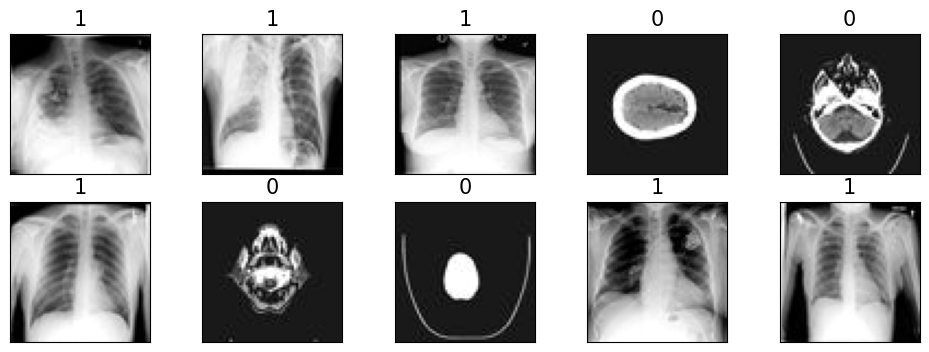




batch 2
------------------------------------------------------------------------------------------------------------------------------------------------


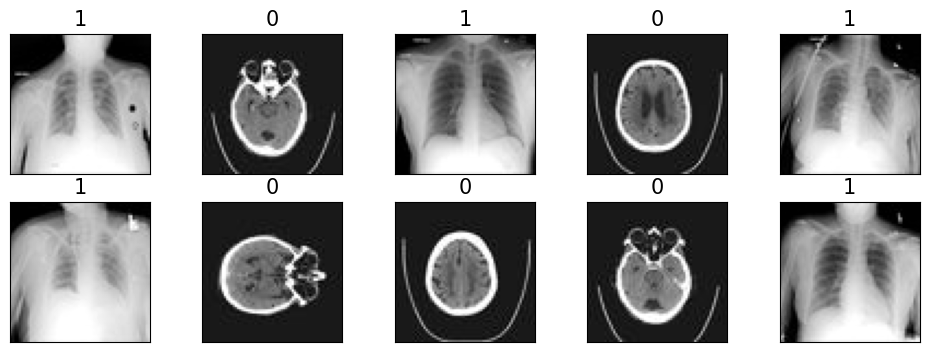




batch 3
------------------------------------------------------------------------------------------------------------------------------------------------


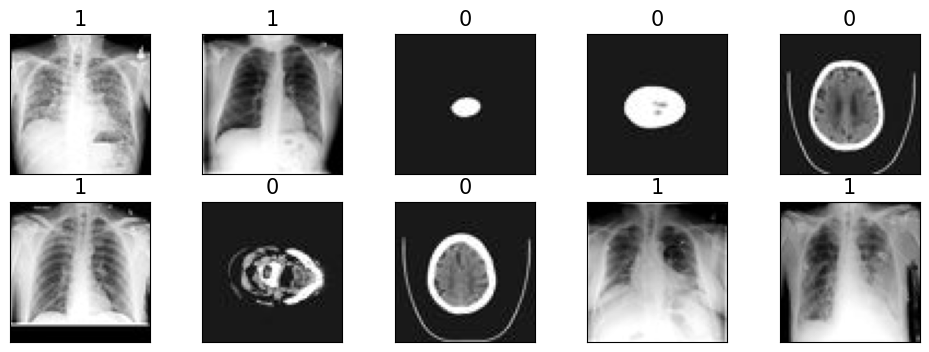




batch 4
------------------------------------------------------------------------------------------------------------------------------------------------


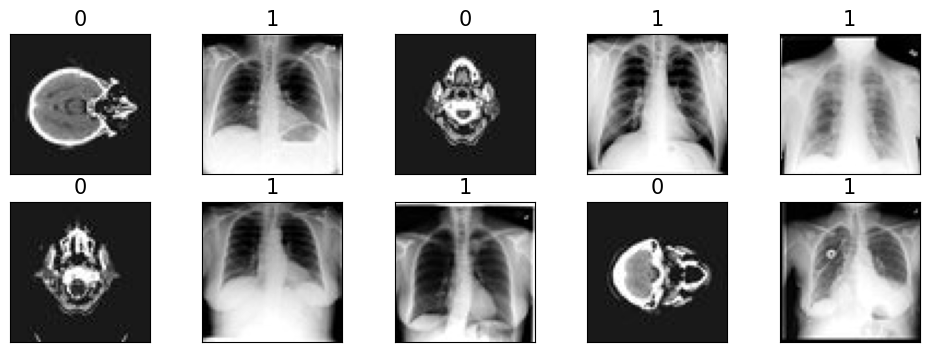




batch 5
------------------------------------------------------------------------------------------------------------------------------------------------


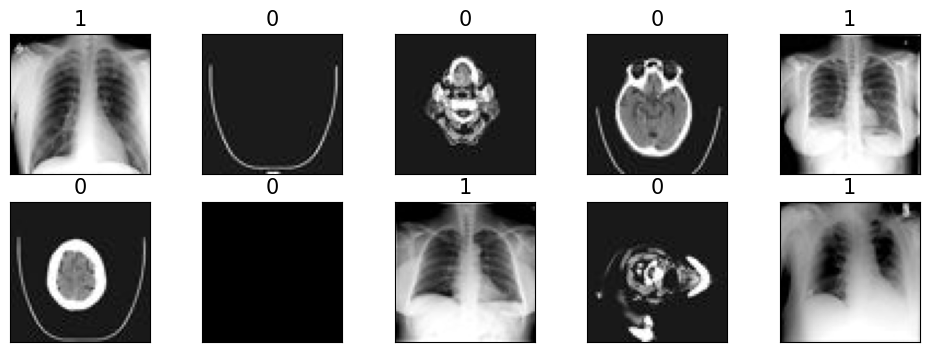




batch 6
------------------------------------------------------------------------------------------------------------------------------------------------


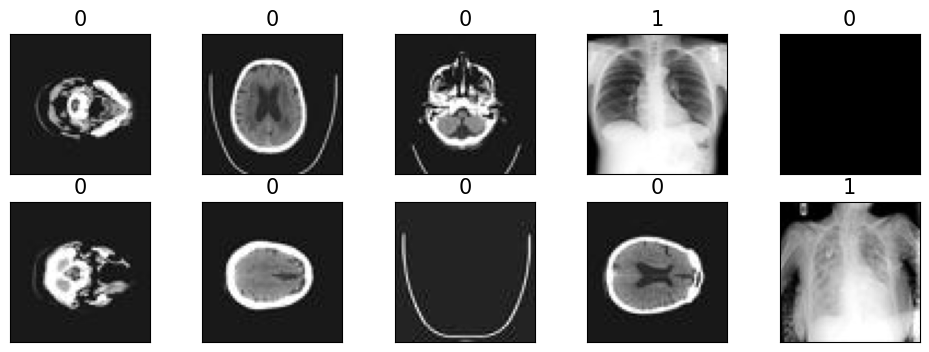




batch 7
------------------------------------------------------------------------------------------------------------------------------------------------


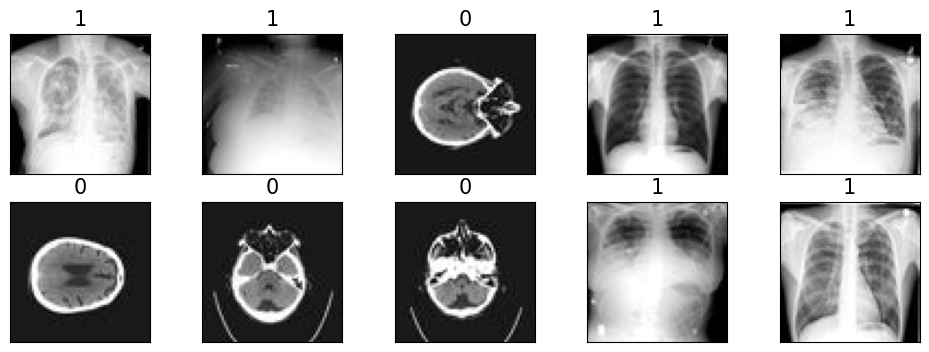




batch 8
------------------------------------------------------------------------------------------------------------------------------------------------


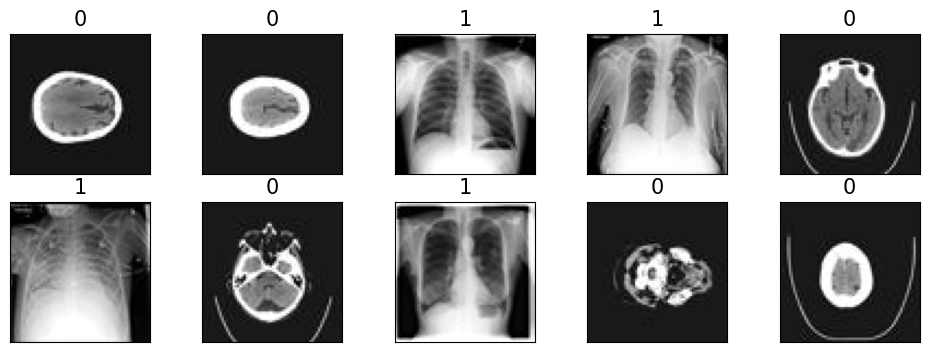




batch 9
------------------------------------------------------------------------------------------------------------------------------------------------


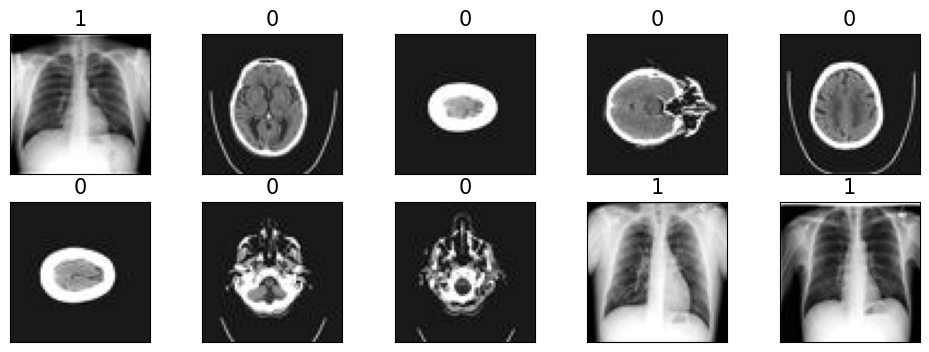




batch 10
------------------------------------------------------------------------------------------------------------------------------------------------


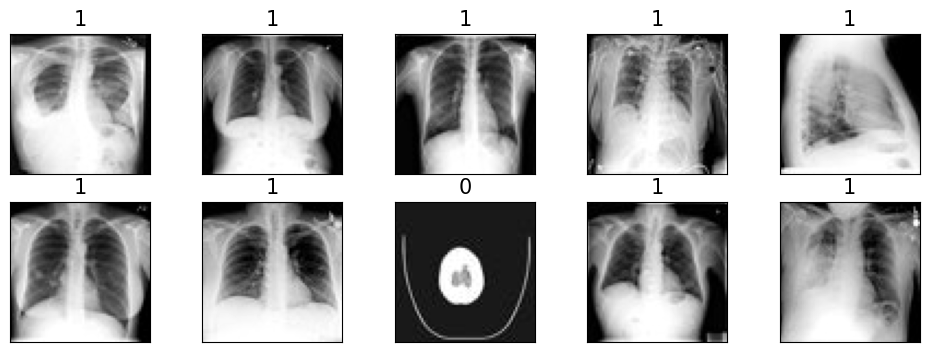

In [ ]:
figure_list = []
for i, batch in enumerate(medimg_data_loader, 1):
  print("batch", i)
  fig = plt.figure(figsize=(12, 4))
  for idx in range(len(batch[0])):
    picidx = idx % 10
    ax = fig.add_subplot(2, 5, picidx+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(batch[0][picidx], cmap='gray')
    ax.set_title(f'{batch[1][idx]}', size=15)
  print("------------------------------------------------------------------------------------------------------------------------------------------------")
  plt.show()
  print("\n\n")
# Batch의 구성: 자료형은 List이고, [Data tensor(instances x features), Label tensor(instances)]로 구성되어있다.

# Building a linear regression model

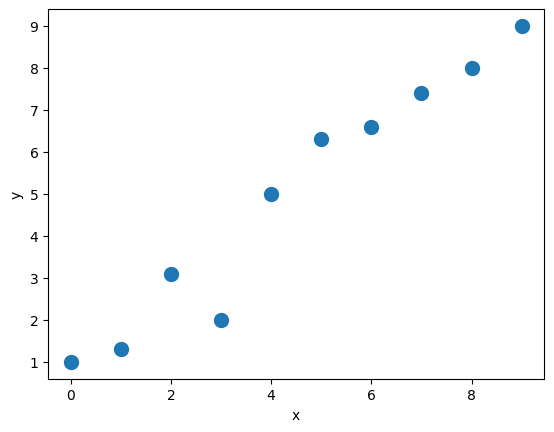

In [ ]:
 X_tr = np.arange(10, dtype='float32').reshape((10, 1))
 y_tr = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0, 9.0], dtype='float32')
 plt.plot(X_tr, y_tr, 'o', markersize=10)
 plt.xlabel('x'); plt.ylabel('y')
 plt.show()

Epoch 0  Loss 46.5720
Epoch 10  Loss 27.1502
Epoch 20  Loss 1.6446
Epoch 30  Loss 14.4571
Epoch 40  Loss 11.7827
Epoch 50  Loss 6.4122
Epoch 60  Loss 0.6339
Epoch 70  Loss 3.1562
Epoch 80  Loss 2.0100
Epoch 90  Loss 0.3107
Epoch 100  Loss 0.7625
Epoch 110  Loss 1.0024
Epoch 120  Loss 0.0232
Epoch 130  Loss 0.5138
Epoch 140  Loss 0.0741
Epoch 150  Loss 1.8712
Epoch 160  Loss 0.0007
Epoch 170  Loss 0.0850
Epoch 180  Loss 0.0634
Epoch 190  Loss 0.0012


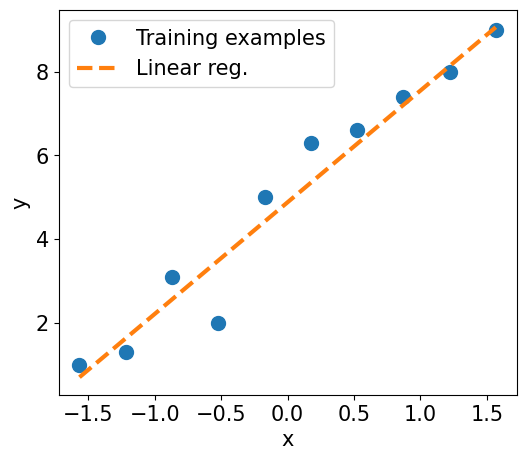

Final Parameters: 2.670930862426758 4.88258695602417


In [ ]:
from torch.utils.data import TensorDataset
X_train_norm = (X_tr - np.mean(X_tr)) / np.std(X_tr)
X_train_norm = torch.from_numpy(X_train_norm)
y_tr = torch.from_numpy(y_tr)
train_ds = TensorDataset(X_train_norm, y_tr)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb): return xb @ weight + bias
def loss_fn(input, target): return (input-target).pow(2).mean()

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
  with torch.no_grad():
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % log_epochs==0:
    print(f'Epoch {epoch}  Loss {loss.item():.4f}')

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_tr)) / np.std(X_tr)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_tr, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()
print('Final Parameters:', weight.item(), bias.item())

In [ ]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
# 1. Generate predictions
    pred = model(x_batch)[:, 0]
# 2. Calculate loss
    loss = loss_fn(pred, y_batch)
    loss.backward()
# 3. Compute gradients
    optimizer.step()
# 4. Update parameters using gradients
    optimizer.zero_grad()
# 5. Reset the gradients to zero
  if epoch % log_epochs==0:
    print(f'Epoch {epoch}  Loss {loss.item():.4f}')
print('Final Parameters:', model.weight.item(), model.bias.item())

Epoch 0  Loss 47.6876
Epoch 10  Loss 50.4484
Epoch 20  Loss 24.2423
Epoch 30  Loss 16.5552
Epoch 40  Loss 0.6268
Epoch 50  Loss 7.8211
Epoch 60  Loss 5.4203
Epoch 70  Loss 3.7824
Epoch 80  Loss 0.2559
Epoch 90  Loss 1.4723
Epoch 100  Loss 1.4047
Epoch 110  Loss 1.2303
Epoch 120  Loss 1.4186
Epoch 130  Loss 0.4438
Epoch 140  Loss 0.1175
Epoch 150  Loss 0.0309
Epoch 160  Loss 0.3768
Epoch 170  Loss 0.0917
Epoch 180  Loss 0.0035
Epoch 190  Loss 0.3780
Final Parameters: 2.6548919677734375 4.867091178894043


# 예제 2. Heart Disease Predicition by Deep Neural Network

In [ ]:
heart_disease_dataset = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")

In [ ]:
heart_disease_dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=heart_disease_dataset.iloc[:, :-1]
y=np.zeros(len(heart_disease_dataset)).astype(int)
y[heart_disease_dataset['Heart Disease'] == 'Presence'] = 1

X_train, X_test, y_train, y_test =  # train_test_split을 이용하여 훈련 데이터 셋과 테스트 데이터 셋을 분리(stratify=y, random_state=42, test_size=0.2로 설정)

scaler = # 변수 스케일링 객체 생성
X_train_scaled = # 훈련데이터 셋 변수 스케일링
X_test_scaled = # 테스트 데이터 셋 스케일링

In [ ]:
import torch.nn as nn
torch.manual_seed(42)
loss = nn.BCELoss()
input_size = 13
hidden_size = 20
output_size = 1

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
heart_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1))
Trainset_Dataloader = DataLoader(heart_dataset, batch_size=32, shuffle=True)

In [ ]:
class HeartDiseasePredictionModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    '''
    신경망 층을 초기화하는 코드를 작성해주세요
    Layer1: nn.Linear를 활용하여 input_size, hidden_size
    Layer2: nn.Linear를 활용하여 hidden_size, output_size
    '''

  def forward(self, x):
    '''
    [모델의 연산과정 코드를 작성해주세요]
    Layer 1
    ReLU
    Layer 2
    Sigmoid
    '''
    return x

model = # 모델 객체를 만들어 주세요
optimizer = # 옵티마이저 torch.optim.Adam 을 만들어주세요

In [ ]:
from torch.utils.data import TensorDataset
num_epochs = 150
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in Trainset_Dataloader:
    pred = # 1. 예측 값 생성
    loss_value = # 2. 손실 값 계산
    # 3. 변화율 계산
    # 4. 모델 파라미터 업데이트
    # 5. 옵티마티저 초기화
    loss_hist[epoch] += loss_value.item()*y_batch.size(0)
    is_correct = (pred == y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  loss_hist[epoch] /= len(Trainset_Dataloader.dataset)
  accuracy_hist[epoch] /= len(Trainset_Dataloader.dataset)
  if epoch % 10 == 0:
    print(f'Epoch {epoch}  Loss {loss_value.item():.3f}')

Epoch 0  Loss 0.585
Epoch 10  Loss 0.097
Epoch 20  Loss 0.069
Epoch 30  Loss 0.031
Epoch 40  Loss 0.005
Epoch 50  Loss 0.002
Epoch 60  Loss 0.003
Epoch 70  Loss 0.001
Epoch 80  Loss 0.000
Epoch 90  Loss 0.001
Epoch 100  Loss 0.000
Epoch 110  Loss 0.001
Epoch 120  Loss 0.000
Epoch 130  Loss 0.000
Epoch 140  Loss 0.000


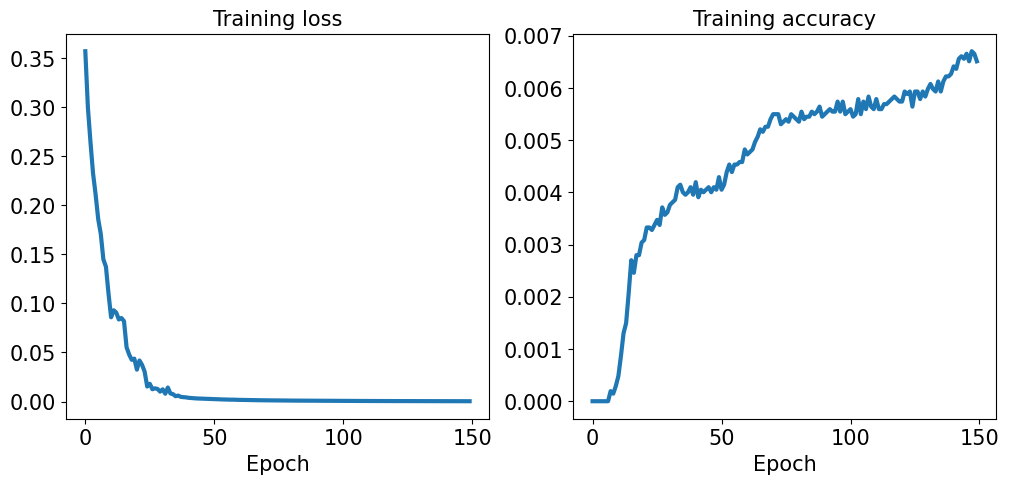

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
test_predict = model(torch.tensor(X_test_scaled, dtype=torch.float32))
p = np.array(test_predict > 0.5).astype(int)
print("Accuracy:", np.round(accuracy_score(y_test, p), 3))
print("Recall:", np.round(recall_score(y_test, p), 3))
print("Precision:", np.round(precision_score(y_test, p), 3))
print("F1:", np.round(f1_score(y_test, p), 3))
print("ROC AUC:", np.round(roc_auc_score(y_test, np.array(test_predict.detach())), 3))

Accuracy: 0.815
Recall: 0.917
Precision: 0.733
F1: 0.815
ROC AUC: 0.843


In [ ]:
path = '/content/drive/MyDrive/Heart_Disease_Classifier.pt'
torch.save(model, path)
model_new = torch.load(path)
model_new.eval()

HeartDiseasePredictionModel(
  (layer1): Linear(in_features=13, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=1, bias=True)
)

In [ ]:
test_predict = model_new(torch.tensor(X_test_scaled, dtype=torch.float32))
p = np.array(test_predict > 0.5).astype(int)
print("Accuracy:", np.round(accuracy_score(y_test, p), 3))
print("Recall:", np.round(recall_score(y_test, p), 3))
print("Precision:", np.round(precision_score(y_test, p), 3))
print("F1:", np.round(f1_score(y_test, p), 3))
print("ROC AUC:", np.round(roc_auc_score(y_test, np.array(test_predict.detach())), 3))

Accuracy: 0.815
Recall: 0.917
Precision: 0.733
F1: 0.815
ROC AUC: 0.843


In [ ]:
path2 = '/content/drive/MyDrive/Heart_Disease_Classifier2.pt'
torch.save(model.state_dict(), path2)
model_new2 = HeartDiseasePredictionModel(input_size, hidden_size, output_size)
model_new2.load_state_dict(torch.load(path2))

test_predict = model_new2(torch.tensor(X_test_scaled, dtype=torch.float32))
p = np.array(test_predict > 0.5).astype(int)
print("Accuracy:", np.round(accuracy_score(y_test, p), 3))
print("Recall:", np.round(recall_score(y_test, p), 3))
print("Precision:", np.round(precision_score(y_test, p), 3))
print("F1:", np.round(f1_score(y_test, p), 3))
print("ROC AUC:", np.round(roc_auc_score(y_test, np.array(test_predict.detach())), 3))

Accuracy: 0.815
Recall: 0.917
Precision: 0.733
F1: 0.815
ROC AUC: 0.843
